# Consultant of Network Attack Detection


deskripsi (ada di pdf).
Network Intrusion Detection  System (NIDS)

As a network attack detection consultant, we have been provided with two datasets: one for training and one for prediction. With these datasets, we can already narrow down the scope of our analysis, which in this case is creating a predictive model. Predictive model will naturally involve machine learning techniques. However, the field of machine learning itself is quite broad.

Therefore, we will begin by closely examining the data to refine our analysis to choose the best algorithm to discover the |predictive model for effective network attack detection. This process involves exploring the data, identifying relevant features, and iteratively refining our approach until we find the most suitable predictive model.

## Goal

Making Network Intrusion Detection System (NIDS) 

Untuk menganalisis klasifikasi type of attack berdasarkan variabel kunci (key var).

Untuk menemukan model klasifikasi terbaik (objectives)

## Source of the dataset

GDrive: [click here](https://drive.google.com/drive/folders/1lOz8fx9AI7lWSEN9myIn18RmMrPErq8D?usp=drive_link)

## Atribute Information

The inputs (Var X/independent var) are as follows

- duration
- protocol_type
- service
- flag
- src_bytes
- dst_bytes
- land
- wrong_fragment
- urgent
- hot
- num_failed_logins
- logged_in
- num_compromised
- root_shell
- su_attempted
- num_root
- num_file_creations
- num_shells
- num_access_files
- num_outbound_cmds
- is_host_login
- is_guest_login
- count
- srv_count
- serror_rate
- srv_serror_rate
- rerror_rate
- srv_rerror_rate
- same_srv_rate
- diff_srv_rate
- srv_diff_host_rate
- dst_host_count
- dst_host_srv_count
- dst_host_same_srv_rate
- dst_host_diff_srv_rate
- dst_host_same_src_port_rate
- dst_host_srv_diff_host_rate
- dst_host_serror_rate
- dst_host_srv_serror_rate
- dst_host_rerror_rate
- dst_host_srv_rerror_rate
- type_of_attack

The output (target/Y/dependent var) is as follow:

- deteck attack

# Import Library


In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# from ydata_profiling import ProfileReport

# Import Dataset

In [20]:
train_PATH = 'D:\DAC-2023\Dataset\DataTrain_Preliminary.csv'
pred_PATH = 'D:\DAC-2023\Dataset\Data_Prediction.csv'

Kita memiliki 2 dataset, training dataset dan validation dataset. training dataset akan digunakann untuk melatih model machine learning dan validation dataset akan digunakan untuk mengevaluasi model dan mengukur akurasinya. 

In [21]:
df_t = pd.read_csv(train_PATH, delimiter=';')
df_p = pd.read_csv(pred_PATH, delimiter=';')
df_t.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,type_of_attack
0,0,tcp,private,SH,0,0,0,0,0,0,...,1,0.01,0.94,0.95,0,0.95,1,0,0,nmap
1,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.08,0.00,0,1.00,1,0,0,neptune
2,0,tcp,http,SF,285,3623,0,0,0,0,...,228,1.00,0.00,0.01,*,0.00,0,0,0,normal
3,0,tcp,http,SF,232,584,0,0,0,0,...,255,1.00,0.00,0.17,*,0.00,0,0,0,normal
4,1,tcp,smtp,SF,1080,327,0,0,0,0,...,154,0.58,0.02,0.00,*,0.00,0,0,0,normal


In [22]:
df_t.shape

(112446, 42)

In [23]:
train_cols = set(df_t.columns)
pred_cols = set(df_p.columns)

print("Columns in df_train but not in df_pred:", train_cols - pred_cols)
print("Columns in df_pred but not in df_train:", pred_cols - train_cols)

Columns in df_train but not in df_pred: {'type_of_attack'}
Columns in df_pred but not in df_train: {'id'}


Saat ini kita fokus terhadap training dataset terlebih dahulu. Pada training data kita memiliki kolom type_of_attack. Untuk menentukan model prediksi yang akan digunakan, maka kita akan menganalisis kolom type_of_attack ini.

## Feature Description

- duration : the length of time connection in seconds
- protocol_type : the protocol used fot the connection
- service : the name of the network service on the target host
- flag : the status or state of the connection
- src_bytes : the number of bytes transferred from the source to destination
- dst_bytes : the number of bytes transferred from the destination to source
- land : indicates whether the connection is from/to the same host/port (1 if yes, 0 if no)
- wrong_fragment : the number of "wrong" fragments in a connection
- urgent : the number of urgent packets in a connection
- hot : the number of "hot" indicators in a connection
- num_failed_logins : the number of failed login attempts
- logged_in : indicates whether a login was successfully performed (1 if yes, 0 if no)
- num_compromised : the number of hosts compromised through the connection
- root_shell : indicates whether a root shell was obtained (1 if yes, 0 if no)
- su_attempted : indicates whether a "su root" command was attempted (1 if yes, 0 if no)
- num_root : the number of root access obtained
- num_file_creations : the number of file creation operations
- num_shells : te number of shell prompts
- num_access_files : the number of operations on access control files
- num_outbound_cmds : the number of outbound commands in an FTP session
- is_host_login : indicates whether the login belongs to the "hot" list (1 if yes, 0 if no)
- is_guest_login : indicates whether the login is a guest login (1 if yes, 0 if no)
- count : the number of connections to the same host as the current connection in the past two seconds
- srv_count : the number of connections to the same service as the current connection in the past two seconds
- serror_rate : the percentage of connections that had "SYN" errors (SYN : SYNCHRONIZE)
- srv_serror_rate : the percentage of connections to the same service that had "SYN" errors
- rerror_rate : the percentage of connections to the same service that had "REJ" errors (REJ : REJECTION) 
- srv_rerror_rate : the percentage of connections to the same 
service that had "REJ" errors
- same_srv_rate : the percentage of connections to the same service
- diff_srv_rate : the percentage of connections to different services
- srv_diff_host_rate : the percentage of connections to different hosts
- dst_host_count : the number of connections to the same destination host in the past two seconds
- dst_host_srv_count : the number of connections to the same destination service in the past two seconds
- dst_host_same_srv_rate : the percentage of connections to the same destination service
- dst_host_diff_srv_rate : the percentage of connections to different destination services
- dst_host_same_src_port_rate : he percentage of connections to the same destination host that originate from the same source port
- dst_host_srv_diff_host_rate : the percentage of connections to the same destination service but originating from different host
- dst_host_serror_rate : the percentage of connections to a specific destination host that have a “SYN” error
- dst_host_srv_serror_rate : the percentage of connections to a specific destination service that have a “SYN” error
- dst_host_rerror_rate : the percentage of connections to a specific destination host that have a “REJ” error
- dst_host_srv_rerror_rate : the percentage of connections to a specific destination service that have a “REJ” error
- type_of_attack : type of attack

In [24]:
df_t.protocol_type.unique()

array(['tcp', 'udp', 'icmp', nan], dtype=object)

In [25]:
df_t.type_of_attack.unique()

array(['nmap', 'neptune', 'normal', 'Denial of Service Attack',
       'portsweep', 'satan', 'ipsweep', 'smurf'], dtype=object)

# 2. Exploratory Data Analysis (EDA)

## Statistika umum

In [26]:
df_t.describe()

,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate
count,112118.000000,112203.000000,112008.000000,112018.000000
mean,514.254458,238.042508,53.712086,145.797601
std,7149.084974,4872.291724,2313.831459,3811.799426
min,0.000000,0.000000,0.000000,0.000000
25%,0.050000,0.000000,0.000000,0.000000
50%,0.510000,0.030000,0.000000,0.000000
75%,1.000000,0.070000,0.060000,1.000000
max,99999.000000,99999.000000,99999.000000,99999.000000


## Fitur terkait keamanan

In [27]:
k_secure = df_t[['num_failed_logins', 'num_access_files', 
                 'num_compromised', 'root_shell', 
                 'su_attempted', 'type_of_attack']]
k_secure.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
0,0,0,0,0,0,nmap
1,0,0,0,0,*,neptune
2,0,0,0,0,0,normal
3,0,0,0,0,0,normal
4,0,0,0,0,0,normal


In [28]:
k_secure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   num_failed_logins  112446 non-null  object
 1   num_access_files   112446 non-null  object
 2   num_compromised    112446 non-null  object
 3   root_shell         112446 non-null  object
 4   su_attempted       112446 non-null  object
 5   type_of_attack     112446 non-null  object
dtypes: object(6)
memory usage: 5.1+ MB


In [29]:
k_secure_sorted1 = k_secure.sort_values(by='num_failed_logins', ascending=False)
k_secure_sorted1.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
110338,99999,0,0,0,0,normal
45932,99999,0,0,0,0,normal
30276,99999,0,0,0,0,normal
85830,99999,0,0,0,0,satan
110455,99999,0,0,0,0,satan


In [30]:
k_secure_sorted2 = k_secure.sort_values(by='num_access_files', ascending=False)
k_secure_sorted2.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
100990,0,99999,0,0,0,normal
46499,0,99999,0,0,0,normal
35873,0,99999,0,0,0,normal
60012,0,99999,0,0,0,normal
64112,0,99999,0,0,0,normal


In [31]:
k_secure_sorted3 = k_secure.sort_values(by='num_compromised', ascending=False)
k_secure_sorted3.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
79805,0,0,99999,0,0,normal
36650,0,0,99999,0,0,normal
33235,0,0,99999,0,0,normal
90245,0,0,99999,0,0,normal
72852,0,0,99999,0,0,normal


In [32]:
k_secure_sorted4 = k_secure.sort_values(by='root_shell', ascending=False)
k_secure_sorted4.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
107786,0,0,0,99999,0,normal
64189,0,0,0,99999,0,normal
72672,0,0,0,99999,0,normal
104207,0,0,0,99999,0,normal
58819,0,0,0,99999,0,normal


In [33]:
k_secure_sorted5 = k_secure.sort_values(by='su_attempted', ascending=False)
k_secure_sorted5.head()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
29318,0,0,0,0,99999,normal
77621,0,0,0,0,99999,normal
95250,0,0,0,0,99999,normal
102248,0,0,0,0,99999,normal
2544,0,0,0,0,99999,normal


In [34]:
k_secure.describe()

,num_failed_logins,num_access_files,num_compromised,root_shell,su_attempted,type_of_attack
count,112446,112446,112446,112446,112446,112446
unique,7,12,82,4,5,8
top,0,0,0,0,0,normal
freq,111800,111500,110875,112009,112100,60538


In [35]:
k_secure['num_failed_logins'].value_counts().sort_index()

num_failed_logins
*           405
0        111800
1            47
2             8
3             5
4             2
99999       179
Name: count, dtype: int64

## FItur Terkait koneksi

In [36]:
c_conection = df_t[['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'type_of_attack']]
c_conection.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,type_of_attack
0,0,tcp,private,SH,0,0,nmap
1,0,tcp,private,S0,0,0,neptune
2,0,tcp,http,SF,285,3623,normal
3,0,tcp,http,SF,232,584,normal
4,1,tcp,smtp,SF,1080,327,normal


In [37]:
c_conection.describe()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,type_of_attack
count,112446,111778,111426,111593,112446,112446,112446
unique,2665,3,70,11,3201,8843,8
top,0,tcp,http,SF,0,0,normal
freq,102916,90997,36013,65941,44030,60138,60538


In [38]:
c_conection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   duration        112446 non-null  object
 1   protocol_type   111778 non-null  object
 2   service         111426 non-null  object
 3   flag            111593 non-null  object
 4   src_bytes       112446 non-null  object
 5   dst_bytes       112446 non-null  object
 6   type_of_attack  112446 non-null  object
dtypes: object(7)
memory usage: 6.0+ MB


## Fitur Error Rate

In [39]:
r_error = df_t[['serror_rate', 'rerror_rate', 
                'srv_serror_rate', 'srv_rerror_rate', 
                'dst_host_serror_rate', 'dst_host_rerror_rate', 'type_of_attack']]
r_error.head() 

,serror_rate,rerror_rate,srv_serror_rate,srv_rerror_rate,dst_host_serror_rate,dst_host_rerror_rate,type_of_attack
0,1,0,1,0,0.95,0,nmap
1,1,0,1,0,1.00,0,neptune
2,0,0,0,0,0.00,0,normal
3,0,0,0,0,0.00,0,normal
4,0,0,0,0,0.00,0,normal


In [40]:
r_error.describe()

,dst_host_serror_rate
count,112018.000000
mean,145.797601
std,3811.799426
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,99999.000000


In [41]:
r_error.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   serror_rate           112446 non-null  object 
 1   rerror_rate           112446 non-null  object 
 2   srv_serror_rate       112446 non-null  object 
 3   srv_rerror_rate       112446 non-null  object 
 4   dst_host_serror_rate  112018 non-null  float64
 5   dst_host_rerror_rate  112446 non-null  object 
 6   type_of_attack        112446 non-null  object 
dtypes: float64(1), object(6)
memory usage: 6.0+ MB


In [53]:
r_error_g = r_error.groupby(by='type_of_attack')['serror_rate'].count().sort_values(ascending=False)
r_error_g

type_of_attack
normal                      60538
neptune                     37142
ipsweep                      3254
satan                        3248
portsweep                    2687
smurf                        2394
Denial of Service Attack     1861
nmap                         1322
Name: serror_rate, dtype: int64

## Fitur Terkait Host (BERANTAKAN)

Clean wkwk hapus "*" value dan hapus "99999" value

In [163]:
host = df_t[['dst_host_count', 'dst_host_srv_count', 
             'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'type_of_attack']]
host.head()

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
0,176,1,0.01,0.94,nmap
1,255,5,0.02,0.08,neptune
2,115,228,1.00,0.00,normal
3,6,255,1.00,0.00,normal
4,202,154,0.58,0.02,normal


In [159]:
# Membuat bubble plot hanya untuk data yang memiliki dst_host_count dan dst_host_srv_count == '99999'
filtered_host = host[(host['dst_host_srv_count'] == '99999')]

In [160]:
filtered_host

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
1695,18,99999,0.06,1.00,ipsweep
2217,255,99999,0.02,0.07,neptune
6217,255,99999,0.05,0.07,neptune
6680,255,99999,0.05,0.06,neptune
7104,255,99999,0.03,0.08,neptune
...,...,...,...,...,...
110114,1,99999,1.00,0.00,ipsweep
110171,255,99999,0.07,0.08,neptune
110535,1,99999,1.00,0.00,ipsweep
110541,255,99999,0.01,0.07,neptune


In [162]:
fgrup = filtered_host.groupby(by='type_of_attack')['dst_host_srv_count'].count().sort_values(ascending=False)
fgrup

type_of_attack
neptune    50
ipsweep    41
Name: dst_host_srv_count, dtype: int64

In [135]:
host.head().sort_values(by='dst_host_count', ascending=False)

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
3,6,255,1.00,0.00,normal
1,255,5,0.02,0.08,neptune
4,202,154,0.58,0.02,normal
0,176,1,0.01,0.94,nmap
2,115,228,1.00,0.00,normal


In [93]:
host.head().sort_values(by='dst_host_srv_count', ascending=False)  

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
1,255,5,0.02,0.08,neptune
3,6,255,1.00,0.00,normal
2,115,228,1.00,0.00,normal
4,202,154,0.58,0.02,normal
0,176,1,0.01,0.94,nmap


In [94]:
host.head().sort_values(by='dst_host_same_srv_rate', ascending=False)

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
2,115,228,1.00,0.00,normal
3,6,255,1.00,0.00,normal
4,202,154,0.58,0.02,normal
1,255,5,0.02,0.08,neptune
0,176,1,0.01,0.94,nmap


In [117]:
host.sort_values(by='type_of_attack', ascending=True)

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,type_of_attack
76369,255,65,0.25,0.04,Denial of Service Attack
40884,233,30,0.13,0.05,Denial of Service Attack
111028,255,43,0.17,0.02,Denial of Service Attack
76925,255,62,0.24,0.01,Denial of Service Attack
88770,255,67,0.26,0.02,Denial of Service Attack
...,...,...,...,...,...
13362,35,35,1.00,0.00,smurf
26000,255,129,0.51,0.04,smurf
34485,255,176,0.69,0.16,smurf
81717,255,44,0.17,0.02,smurf


In [154]:
host.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112446 entries, 0 to 112445
Data columns (total 5 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   dst_host_count          112446 non-null  object 
 1   dst_host_srv_count      112446 non-null  object 
 2   dst_host_same_srv_rate  112118 non-null  float64
 3   dst_host_diff_srv_rate  112203 non-null  float64
 4   type_of_attack          112446 non-null  object 
dtypes: float64(2), object(3)
memory usage: 4.3+ MB


In [110]:
host['dst_host_count'] = pd.to_numeric(host['dst_host_count'])
host['dst_host_srv_count'] = pd.to_numeric(host['dst_host_srv_count'])

In [109]:
host.describe()

,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate
count,110952.000000,110952.000000,110624.00000,110745.000000
mean,183.429141,116.003371,514.86350,241.175111
std,98.462711,110.867151,7153.30994,4904.182929
min,0.000000,0.000000,0.00000,0.000000
25%,86.000000,10.000000,0.05000,0.000000
50%,255.000000,63.000000,0.50000,0.030000
75%,255.000000,255.000000,1.00000,0.070000
max,255.000000,255.000000,99999.00000,99999.000000


In [123]:
invalid_values = host[host['dst_host_count'] == '*'].count()
invalid_values

dst_host_count            588
dst_host_srv_count        588
dst_host_same_srv_rate    588
dst_host_diff_srv_rate    564
type_of_attack            588
dtype: int64

In [156]:
invalid_values2 = host[host['dst_host_count'] == '99999'].count()
invalid_values2

dst_host_count            272
dst_host_srv_count        272
dst_host_same_srv_rate    272
dst_host_diff_srv_rate    260
type_of_attack            272
dtype: int64

In [103]:
host = host[host['dst_host_count'] != '*']
host = host[host['dst_host_srv_count'] != '*']

In [104]:
host = host[host['dst_host_count'] != '99999']
host = host[host['dst_host_srv_count'] != '99999']

In [114]:
host = host[host['type_of_attack'] != 'Normal']

In [68]:
login = df_t[['dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',]]
login.head()

,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0.95,0
1,0.00,0
2,0.01,*
3,0.17,*
4,0.00,*


In [89]:
# Hitung Q1, Q3, dan IQR
Q1 = host['dst_host_count'].quantile(0.25)
Q3 = host['dst_host_count'].quantile(0.75)
IQR = Q3 - Q1

# Hitung Batas Atas dan Batas Bawah
Upper_Bound = Q3 + 1.5 * IQR
Lower_Bound = Q1 - 1.5 * IQR

# Mengecualikan data outlier
filtered_host = host[(host['dst_host_count'] >= Lower_Bound) & (host['dst_host_count'] <= Upper_Bound)]

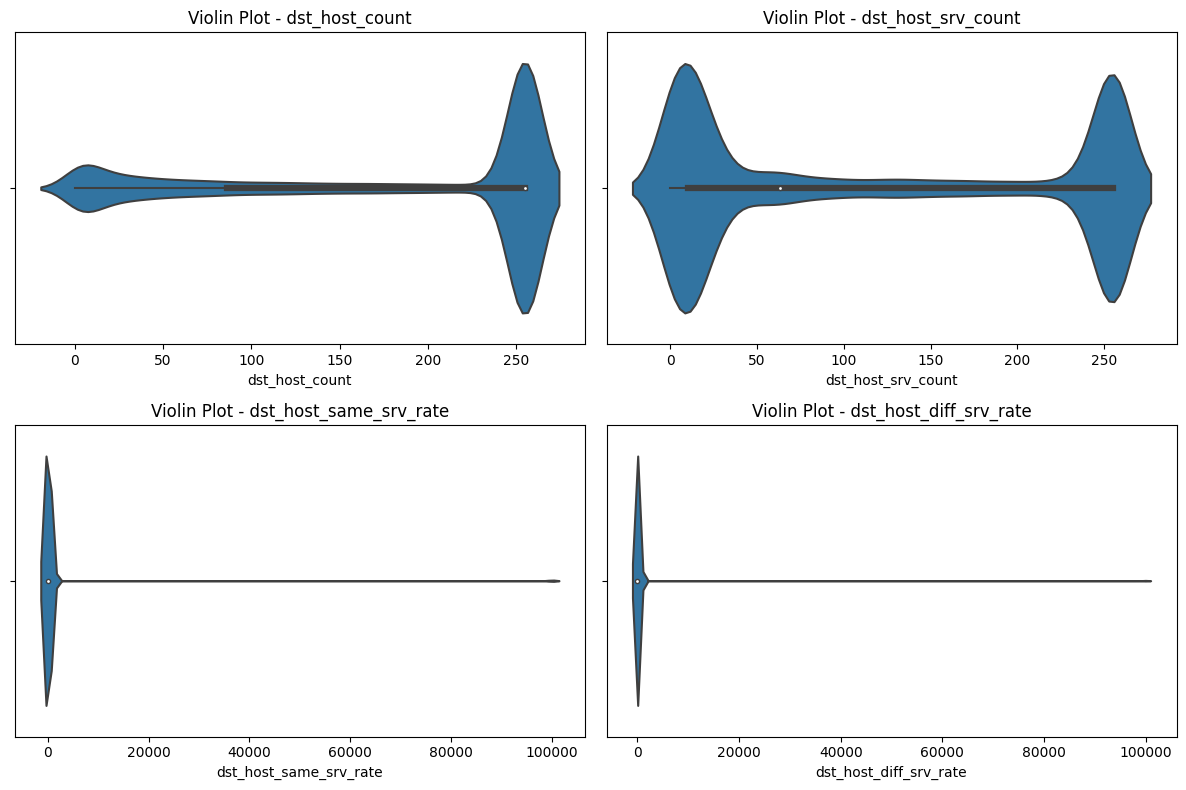

In [118]:
# Membuat sebuah figure dengan subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Membuat violin plot untuk kolom dst_host_count
sns.violinplot(x='dst_host_count', data=host, ax=axes[0, 0])
axes[0, 0].set_title('Violin Plot - dst_host_count')

# Membuat violin plot untuk kolom dst_host_srv_count
sns.violinplot(x='dst_host_srv_count', data=host, ax=axes[0, 1])
axes[0, 1].set_title('Violin Plot - dst_host_srv_count')

# Membuat violin plot untuk kolom dst_host_same_srv_rate
sns.violinplot(x='dst_host_same_srv_rate', data=host, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot - dst_host_same_srv_rate')

# Membuat violin plot untuk kolom dst_host_diff_srv_rate
sns.violinplot(x='dst_host_diff_srv_rate', data=host, ax=axes[1, 1])
axes[1, 1].set_title('Violin Plot - dst_host_diff_srv_rate')

# Mengatur tata letak subplot
plt.tight_layout()

# Menampilkan plot
plt.show()


C:\Users\gusti\AppData\Local\Temp\ipykernel_13032\3059303901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  host['dst_host_count'] = pd.to_numeric(host['dst_host_count'], errors='coerce')


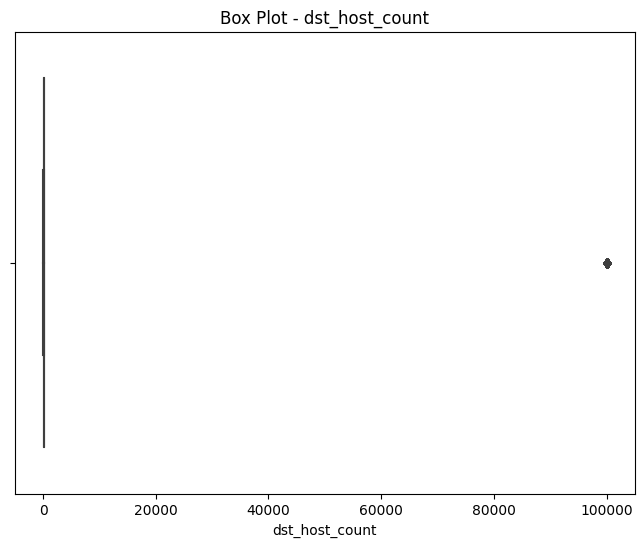

In [128]:
# Konversi kolom dst_host_count menjadi tipe data numerik
host['dst_host_count'] = pd.to_numeric(host['dst_host_count'], errors='coerce')

# Membuat sebuah figure
plt.figure(figsize=(8, 6))

# Membuat boxplot untuk kolom dst_host_count
sns.boxplot(x='dst_host_count', data=host)
plt.title('Box Plot - dst_host_count')

# Menampilkan plot
plt.show()

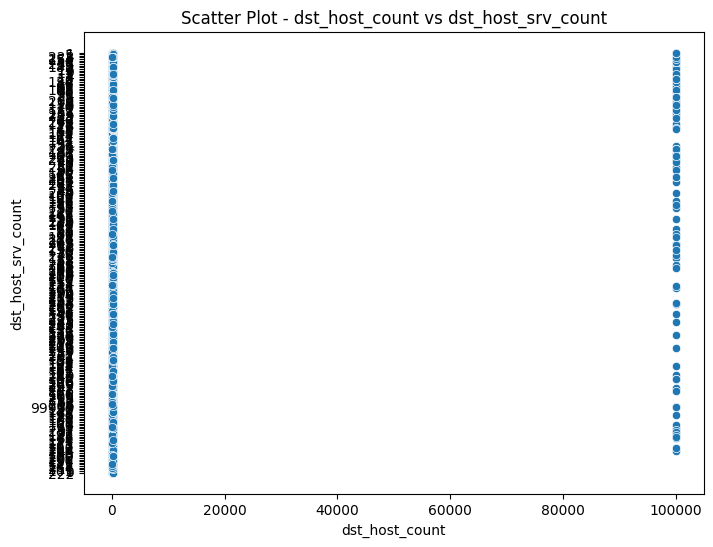

In [129]:
# Membuat sebuah figure
plt.figure(figsize=(8, 6))

# Membuat scatter plot untuk kolom dst_host_count dan dst_host_srv_count
sns.scatterplot(x='dst_host_count', y='dst_host_srv_count', data=host)
plt.title('Scatter Plot - dst_host_count vs dst_host_srv_count')

# Menampilkan plot
plt.show()

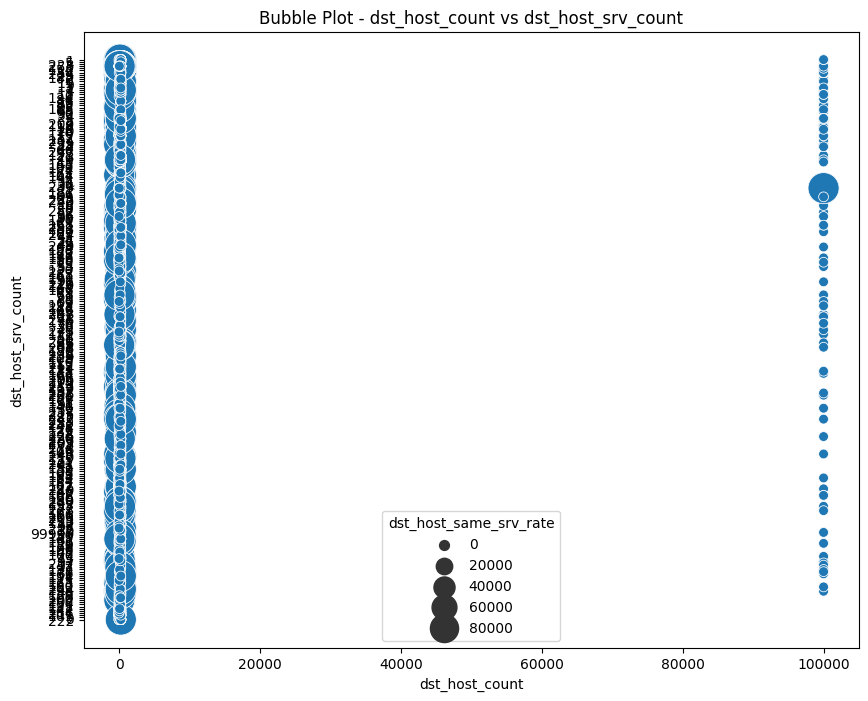

In [130]:
# Membuat bubble plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x='dst_host_count', y='dst_host_srv_count', size='dst_host_same_srv_rate', data=host, sizes=(50, 500))
plt.title('Bubble Plot - dst_host_count vs dst_host_srv_count')
plt.xlabel('dst_host_count')
plt.ylabel('dst_host_srv_count')

# Menampilkan plot
plt.show()

## Fitur Terkait Distribusi Port

In [196]:
port = df_t[['dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'service', 'type_of_attack']]

In [201]:
port.head()

,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,service,type_of_attack
0,0.95,0,private,nmap
1,0.00,0,private,neptune
5,0.00,0,discard,neptune
6,0.01,0,domain_u,normal
7,0.00,0,exec,neptune


In [209]:
port.info()

<class 'pandas.core.frame.DataFrame'>
Index: 77887 entries, 0 to 112444
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dst_host_same_src_port_rate  77682 non-null  float64
 1   dst_host_srv_diff_host_rate  77887 non-null  int64  
 2   service                      77177 non-null  object 
 3   type_of_attack               77887 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.0+ MB


In [203]:
# grupby dst_host_srv_diff_host_rate
p_g1 = port.groupby(by='dst_host_srv_diff_host_rate')['dst_host_same_src_port_rate'].count().sort_values(ascending=False)
p_g1

dst_host_srv_diff_host_rate
0    77057
1      625
Name: dst_host_same_src_port_rate, dtype: int64

In [204]:
# grupby dst_host_srv_diff_host_rate
p_g2 = port.groupby(by='dst_host_srv_diff_host_rate')['dst_host_srv_diff_host_rate'].count().sort_values(ascending=False)
p_g2

dst_host_srv_diff_host_rate
0    77261
1      626
Name: dst_host_srv_diff_host_rate, dtype: int64

In [199]:
# menghapus nilai * pada kolom dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate
port = port[port['dst_host_same_src_port_rate'] != '*']
port = port[port['dst_host_srv_diff_host_rate'] != '*']

In [200]:
# menghapus nilai 99999 pada kolom dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate
port = port[port['dst_host_same_src_port_rate'] != '99999']
port = port[port['dst_host_srv_diff_host_rate'] != '99999']

In [208]:
# merubah tipe data dst_host_same_src_port_rate dan dst_host_srv_diff_host_rate menjadi numerik
port['dst_host_same_src_port_rate'] = pd.to_numeric(port['dst_host_same_src_port_rate'])
port['dst_host_srv_diff_host_rate'] = pd.to_numeric(port['dst_host_srv_diff_host_rate'])

In [215]:
port_x = port

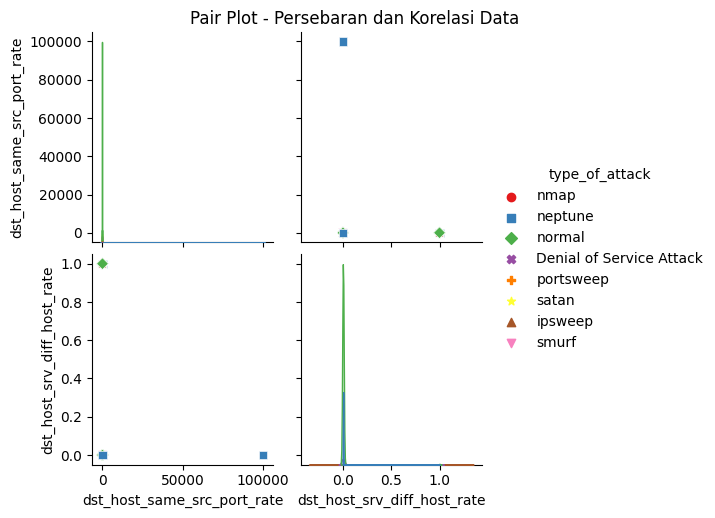

In [216]:
# Specify a list of markers for each unique type_of_attack
markers = ["o", "s", "D", "X", "P", "*", "^", "v"]

# Create a pair plot
sns.pairplot(port_x, hue='type_of_attack', diag_kind='kde', markers=markers, palette='Set1')
plt.suptitle('Pair Plot - Persebaran dan Korelasi Data', y=1.02)

# Show the plot
plt.show()

# Kategori Variabel

In [44]:
k_vars = df_train[['protocol_type', 'service', 'flag']]
k_vars.head()

NameError: name 'df_train' is not defined

## **Looking at Type of Attack**

label column : type of attack

In [ ]:
attack_type = df_train['type_of_attack'].unique()

print("Nilai yang ada dalam kolom x3:")
print(attack_type)

TYPE OF ATTACK :
- nmap
- neptune
- normal
- Denial of Service Attack
- portsweep
- satan
- ipsweep
- smurf

Normal

DOS ATTACK: 
neptune -> working to SYN flood Denial of Service on one or more ports, Neptune attack make the memory resources busy by sending TCP packet requesting to initiate a TCP session,
DOS ->  makes the computer system to be hectic by sending many ping, 
Smurf -> Denial of Service ICMP echo reply flood. 

PROBE: nmap, portsweep, satan, ipsweep, 

This paper focused on Neptune and Smurf types of attack. Those attack characterized as DoS Attack. Dos Attack makes the computer system to be hectic by sending many ping. Neptune attack working to SYN flood Denial of Service on one or more ports while the function of Smurf attack is Denial of Service ICMP echo reply flood. Neptune attack make the memory resources busy by sending TCP packet requesting to initiate a TCP session.  After many TCP packet sent, the computer system finally runs out of memory resources. Smurf attack is the popular type of attack sending ICMP echo request packet to middle device. ICMP packets have source address name as victim’s IP address and middle device address as destination address. DoS attack reduces the performance of server by overflowing the ICMP traffic as discussed above in the Neptune and Smurf attack. So, detection of DoS attack is very significant to protect the system. 

KOLOM KUNCI:
- protocol type
- port
- 

In [ ]:
def filtered_by_type_of_attack(df, values):
    filtered = df[df['type_of_attack'] == values]
    return filtered

In [ ]:
filtered_by_type_of_attack(df_train, 'nmap')

In [ ]:
ProfileReport(filtered_by_type_of_attack(df_train, 'nmap'))

In [ ]:
filtered_by_type_of_attack(df_train, 'neptune')

In [ ]:
filtered_by_type_of_attack(df_train, 'normal')

In [ ]:
filtered_by_type_of_attack(df_train, 'Denial of Service Attack')

In [ ]:
filtered_by_type_of_attack(df_train, 'portsweep')

In [ ]:
filtered_by_type_of_attack(df_train, 'satan')

In [ ]:
filtered_by_type_of_attack(df_train, 'ipsweep')

In [ ]:
filtered_by_type_of_attack(df_train, 'smurf')

## **Duplicate Data**

In [ ]:
duplicates = df_train[df_train.duplicated()]

In [ ]:
duplicates

is it really duplicate? harus nemu variabel kunci yg menentukan itu row duplicate or no. atau jangan jangan nilai duplicate ini bisa jadi kunci network attack (karena patternnya sama)